In [45]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import matplotlib.pyplot as plt

%matplotlib inline  

   uf sigla  pop2000  homens2010  mulheres2010  popurb2010  poprural2010  \
0  11    RO  1379787      793224        767277     1142648        417853   

   pop2010 nome_estado                                                wkt  \
0  1560501    Rondônia   POLYGON((-60.39985823999999 -13.4562824099999...   

     geometria  
0   ST_Polygon  
['uf', 'sigla', 'pop2000', 'homens2010', 'mulheres2010', 'popurb2010', 'poprural2010', 'pop2010', 'nome_estado', 'wkt', 'geometria']


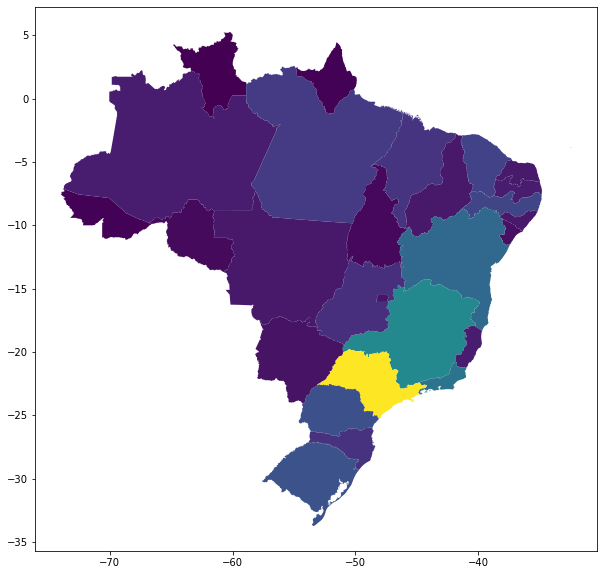

In [46]:


estados = pd.read_csv('csv/estados.csv', delimiter=';', header=0,
                     names=['uf',
                            'sigla',
                            'pop2000',
                            'homens2010',
                            'mulheres2010',
                            'popurb2010',
                            'poprural2010',
                            'pop2010',
                            'nome_estado',
                            'wkt',
                            'geometria'])
print(estados.head(1))

print(list(estados.columns))

estados['geometry'] = estados['wkt'].apply(wkt.loads)

estados_gdf = gpd.GeoDataFrame(estados, crs='epsg:4326')

estados_gdf.plot('pop2010',figsize=(16,10))

In [47]:
# !pip install plotly
# !pip install geopandas==0.10.2

In [48]:
import plotly.express as px

In [49]:
siglas = [x.strip() for x in list(estados_gdf.sigla)]

In [50]:
import plotly.express as px
import geopandas as gpd

fig = px.choropleth_mapbox(estados_gdf,
                           geojson=estados_gdf.geometry,
                           locations=estados_gdf.index,
                           color="pop2010",
                           color_continuous_scale='sunsetdark',
                           center={"lat": -15.80750, "lon": -49.869091391923575},
                           mapbox_style="open-street-map",
                           zoom=3)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(text=siglas, selector=dict(type='choroplethmapbox'))
fig.update_traces(hovertemplate='<b>%{text} </b><br>Population: %{z}',
                   selector=dict(type='choroplethmapbox'))
fig.show()

In [51]:
estados_nogeom = estados[list(set(estados.columns) - set(['wkt', 'geometria', 'geometry']))]
estados_nogeom.head()

uf  popurb2010 nome_estado  poprural2010  homens2010 sigla  pop2010  \
0  11     1142648    Rondônia        417853      793224    RO  1560501   
1  12      532080        Acre        200713      367864    AC   732793   
2  13     2755756    Amazonas        725181     1751328    AM  3480937   
3  14      344780     Roraima        106447      229343    RR   451227   
4  15     5197118        Pará       2390960     3825245    PA  7588078   

   pop2000  mulheres2010  
0  1379787        767277  
1   557526        364929  
2  2812557       1729609  
3   324397        221884  
4  6192307       3762833

In [52]:
print(estados_nogeom.info())
print("\n"+"-"*10)
print("Count")
print(estados_nogeom.count())
print("\n"+"-"*10)
print("Describe")
print(estados_nogeom.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            27 non-null     int64 
 1   popurb2010    27 non-null     int64 
 2   nome_estado   27 non-null     object
 3   poprural2010  27 non-null     int64 
 4   homens2010    27 non-null     int64 
 5   sigla         27 non-null     object
 6   pop2010       27 non-null     int64 
 7   pop2000       27 non-null     int64 
 8   mulheres2010  27 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 2.0+ KB
None

----------
Count
uf              27
popurb2010      27
nome_estado     27
poprural2010    27
homens2010      27
sigla           27
pop2010         27
pop2000         27
mulheres2010    27
dtype: int64

----------
Describe
              uf    popurb2010  poprural2010    homens2010       pop2010  \
count  27.000000  2.700000e+01  2.700000e+01  2.700000e+01  2.700000e+01   
mean  

In [107]:
dtypes = {'Número_da_Autorização' : str, 'Código_Barragem_Fiscalizador' : str}
converters = {'Código_Barragem_Fiscalizador': lambda x : x if (x != '' and x != '0.0') else None}
barragens = pd.read_csv('csv/cadastro-dados-rsb-2020.csv', delimiter=';', header=0, quotechar='"', dtype=dtypes,
                        converters=converters,
                       parse_dates=[16,28]).drop(columns=['Empreendedor Identificado?', 'Tem informação de altura?',
                                                         'Tem informação de volume?', 'Tem informação de altura e volume?',
                                                         'classificada quanto ao CRI?','classificada quanto ao DPA?',
                                                          'Houve alguma inspeção no período deste RSB?',
                                                          'Houve alguma fiscalização no período deste RSB?',
                                                          'N', 'sequência'])
print(barragens.columns)
barragens.head(10)

Index(['Código_SNISB', 'Nome_da_Barragem', 'Nome_Secundário', 'Uso_Principal',
       'UF', 'Município', 'Categoria_de_Risco', 'Dano_Potencial_Associado',
       'Nome_do_Empreendedor', 'Órgão_Fiscalizador',
       'Código_Barragem_Fiscalizador', 'Regulada_pela_PNSB',
       'Número_da_Autorização', 'Possui_PAE', 'Possui_Plano_de_Segurança',
       'Possui_Revisão_Periódica', 'Data_da_Última_Fiscalização',
       'Barragem_Autuada', 'Altura_Fundação_m', 'Altura_Terreno_m',
       'Capacidade_hm³', 'Comprimento_Coroamento_m', 'Tipo_de_Material',
       'Uso_Complementar', 'Classe_de_Resíduo', 'Curso_Dágua_Barrado',
       'Região_Hidrográfica', 'Unidade_de_Gestão', 'Data_da_Última_Inspeção',
       'Tipo_da_Última_Inspeção', 'Nível_de_Perigo_Global', 'Possui_Eclusa',
       'Fase_da_Vida', 'Latitude', 'Longitude', 'Completude dos dados',
       'Barragem Outorgada?', 'Tipo de Empreendedor',
       'Maior altura (fundação ou terreno)', 'Faixa de altura',
       'Faixa de volume'],
      

/usr/local/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning:

Both a converter and dtype were specified for column Código_Barragem_Fiscalizador - only the converter will be used

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning:

Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.



Código_SNISB                                   Nome_da_Barragem  \
0           1.0                                        Rio Bezerra   
1           2.0  Barragem na Área "A" Módulo 12 PAD-DF (Fazenda...   
2           3.0                                  Barragem São Jacó   
3           4.0                          Barragem Fazenda São Luiz   
4           5.0                                  Fazenda São Pedro   
5           6.0                                Barragem Boas Novas   
6           7.0              Barragem no Córrego da Cruz - Aldevar   
7           8.0                       Barragem no Córrego Floresta   
8           9.0        Barragem no Afluente do Córrego Santa Luzia   
9          10.0                      Barragem no Córrego do Engano   

                                     Nome_Secundário Uso_Principal  UF  \
0                                                NaN     Irrigação  GO   
1                                                NaN     Irrigação  DF   
2  Barragem na propriedade Módulo "A" - lote 3 (F...     Irrigação  DF   
3              Barragem Afluente do Córrego Floresta     Irrigação  ES   
4                                                NaN   Aquicultura  MT   
5                                         Açailândia     Recreação  MA   
6                                                NaN     Irrigação  ES   
7                                                NaN     Irrigação  BA   
8                                                NaN     Irrigação  BA   
9                                                NaN     Irrigação  ES   

            Município Categoria_de_Risco Dano_Potencial_Associado  \
0          CABECEIRAS      Não se Aplica                    Baixo   
1            BRASÍLIA      Não se Aplica                    Baixo   
2            BRASÍLIA      Não se Aplica                    Baixo   
3  CONCEIÇÃO DA BARRA      Não se Aplica                    Baixo   
4    PORTO ESPERIDIÃO      Não se Aplica                    Baixo   
5          AÇAILÂNDIA      Não se Aplica                    Baixo   
6       PEDRO CANÁRIO      Não se Aplica                    Baixo   
7              MUCURI      Não se Aplica                    Baixo   
8              MUCURI      Não se Aplica                    Baixo   
9       PEDRO CANÁRIO      Não se Aplica                    Baixo   

               Nome_do_Empreendedor               Órgão_Fiscalizador  ...  \
0     Agropecuária Gado Bravo Ltda.  Agência Nacional de Águas - ANA  ...   
1          Renato Francisco Triacca  Agência Nacional de Águas - ANA  ...   
2              Paulo Roberto Bonato  Agência Nacional de Águas - ANA  ...   
3     Ezequias Ribeiro de Oliveira   Agência Nacional de Águas - ANA  ...   
4      Edir Luciano Martins Manzano  Agência Nacional de Águas - ANA  ...   
5                James Harley Davis  Agência Nacional de Águas - ANA  ...   
6  Aldevar Marcondes Venturim Borgo  Agência Nacional de Águas - ANA  ...   
7                        Lúcio Cani  Agência Nacional de Águas - ANA  ...   
8             Elias Rodrigues Krull  Agência Nacional de Águas - ANA  ...   
9          Edmar Candido de Azevedo  Agência Nacional de Águas - ANA  ...   

  Possui_Eclusa Fase_da_Vida  Latitude Longitude Completude dos dados  \
0           Não          NaN -15.59914 -47.15848                ótima   
1           Não          NaN -16.04806 -47.55556                ótima   
2           Não     Operação -16.00972 -47.60088                ótima   
3           NaN     Operação -18.23833 -39.88861                ótima   
4           Não          NaN -16.27472 -59.17603                ótima   
5           NaN     Operação  -4.59503 -47.75286                ótima   
6           NaN     Operação -18.15678 -39.96632                ótima   
7           NaN     Operação -18.10361 -40.02161                ótima   
8           NaN     Operação -18.08775 -40.04936                ótima   
9           NaN          NaN -18.07889 -40.07639                ótima   

  Bar

In [108]:
print(barragens.info())
print("\n"+"-"*10)
print("Count")
print(barragens.count())
print("\n"+"-"*10)
print("Describe")
print(barragens.describe())
print("\n"+"-"*10)
print("Unique")
print(barragens.nunique(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21953 entries, 0 to 21952
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Código_SNISB                        21548 non-null  float64       
 1   Nome_da_Barragem                    21953 non-null  object        
 2   Nome_Secundário                     2846 non-null   object        
 3   Uso_Principal                       21953 non-null  object        
 4   UF                                  21538 non-null  object        
 5   Município                           21145 non-null  object        
 6   Categoria_de_Risco                  21953 non-null  object        
 7   Dano_Potencial_Associado            21953 non-null  object        
 8   Nome_do_Empreendedor                9685 non-null   object        
 9   Órgão_Fiscalizador                  21953 non-null  object        
 10  Código_Barragem_Fiscal

In [109]:
# barragens['Código_Barragem_Fiscalizador'] = barragens['Código_Barragem_Fiscalizador'].apply(lambda x : x if x != '0.0' else None)
barragens['Código_Barragem_Fiscalizador'].head(10)

0    14
1    80
2    81
3    82
4    94
5    91
6    65
7    64
8    63
9    62
Name: Código_Barragem_Fiscalizador, dtype: object

In [110]:
print(barragens['Código_Barragem_Fiscalizador'].at[0], type(barragens['Código_Barragem_Fiscalizador'].at[0]), barragens['Código_Barragem_Fiscalizador'].at[0] == '0.0')

14 <class 'str'> False


In [111]:
a = list(barragens['Código_Barragem_Fiscalizador'].values)
print(a[195:205])

['156690567105', '281421/2011', '99203/2009', '147640567102', '116080500067', '86150500065', '103800567103', '103810567106', '116120500062', '127770567086']


In [112]:
barragens[['Data_da_Última_Fiscalização', 'Data_da_Última_Inspeção']].head(10)

Data_da_Última_Fiscalização Data_da_Última_Inspeção
0                         NaT                     NaT
1                         NaT                     NaT
2                         NaT                     NaT
3                         NaT              2013-07-29
4                         NaT                     NaT
5                         NaT                     NaT
6                         NaT              2012-03-15
7                         NaT              2012-03-20
8                         NaT              2012-05-30
9                         NaT                     NaT

In [64]:
rios = gpd.read_file('shps/geoft_bho_rio.shp').drop(columns=['DSVERSAO'])

In [57]:
rios.columns

Index(['IDRIO', 'CORIO', 'NORIOCOMP', 'NUDISTBACR', 'NUCOMPRIO', 'DSVERSAO',
       'geometry'],
      dtype='object')

In [67]:
rios_names = {'IDRIO' : 'id', 'CORIO' : 'cod_rio', 'NORIOCOMP' : 'nome', 
              'NUDISTBACR' : 'dist_bacia', 'NUCOMPRIO' : 'comprimento',
}
rios.rename(columns=rios_names, inplace=True)

In [68]:
rios.columns

Index(['id', 'cod_rio', 'nome', 'dist_bacia', 'comprimento', 'geometry'], dtype='object')

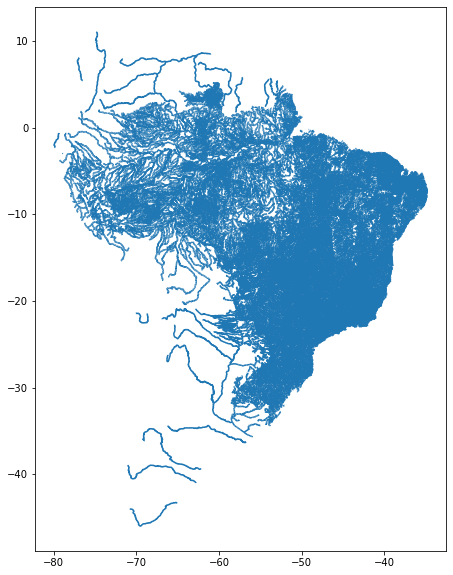

In [63]:
rios.plot(figsize=(16, 10))

In [114]:
uc = gpd.read_file('shps/unidade_conservacao_2020.shp').drop(columns=['geometriaA'])
uc.columns

Index(['codigoCnuc', 'nome', 'anoCriacao', 'sigla', 'areaHa', 'perimetroM',
       'atoLegal', 'administra', 'SiglaGrupo', 'UF', 'municipios', 'biomaIBGE',
       'biomaCRL', 'CoordRegio', 'fusoAbrang', 'UORG', 'geometry'],
      dtype='object')

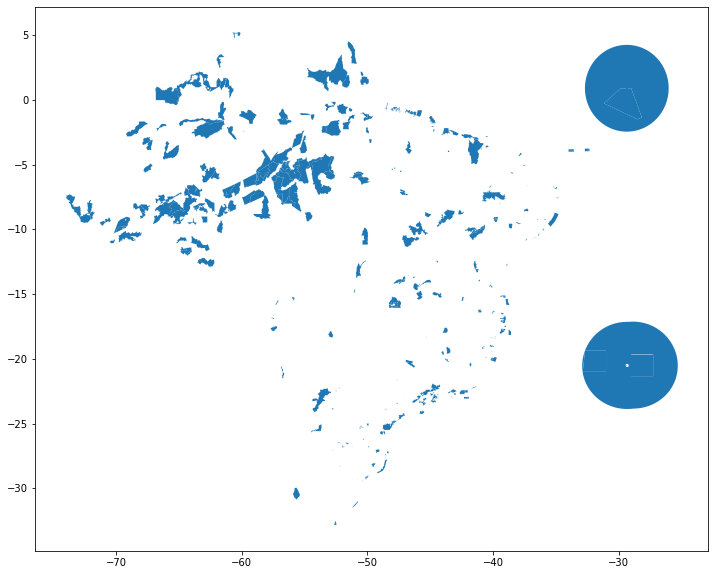

In [115]:
uc.plot(figsize=(16, 10))

In [118]:
pnt_captacao = gpd.read_file('shps/pnt_captacao.shp')
pnt_captacao.columns

Index(['cdcap', 'cdatlas', 'cdatlasadp', 'nmman', 'tpman', 'nmsis', 'tpsis',
       'nmuf', 'nnmun', 'geometry'],
      dtype='object')

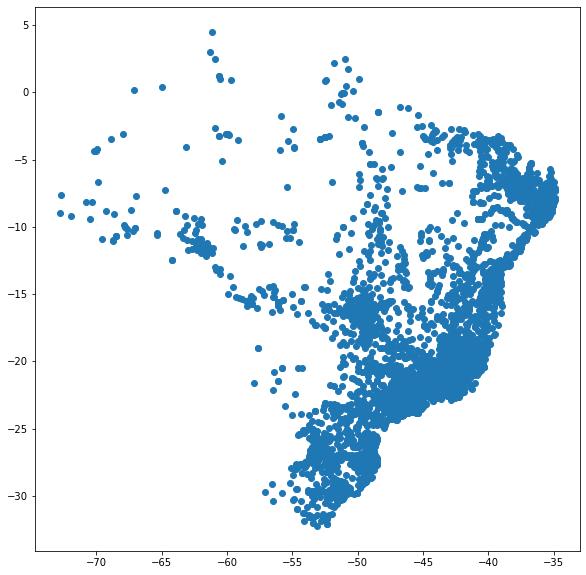

In [119]:
pnt_captacao.plot(figsize=(16, 10))

In [120]:
adutoras = gpd.read_file('shps/adutoras.shp')
adutoras.columns

Index(['ADUTORA', 'SITUAÇÃO', 'ESTADO', 'geometry'], dtype='object')

In [122]:
adutoras.columns

Index(['adutora', 'situacao', 'estado', 'geometry'], dtype='object')

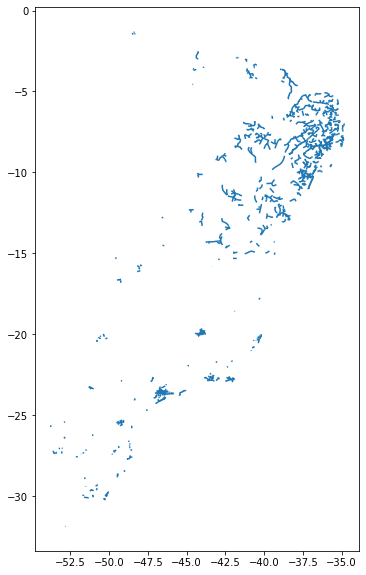

In [121]:
adutoras_names = {'ADUTORA' : 'adutora', 'SITUAÇÃO' : 'situacao', 'ESTADO' : 'estado'
}
adutoras.rename(columns=adutoras_names, inplace=True)
adutoras.plot(figsize=(16, 10))

In [58]:
munbrasilpop = pd.read_csv('csv/munbrasilpop.csv', delimiter=';', header=0,
                     names=['mun', 'uf', 'sigla', 'nome_mun',
                            'regiao', 'meso', 'nome_meso',
                            'micro', 'nome_micro', 'nome_munic',
                            'pop2000', 'homens2010', 'mulheres2010',
                            'popurb2010', 'poprural2010', 'pop2010',
                            'wkt', 'geometria'
                           ]).drop(columns=['geometria'])


print(list(munbrasilpop.columns))

munbrasilpop['geometry'] = munbrasilpop['wkt'].apply(wkt.loads)

munbrasilpop_gdf = gpd.GeoDataFrame(munbrasilpop, crs='epsg:4326').drop(columns=['wkt'])

munbrasilpop_gdf.head(1)

# estados_gdf.plot('pop2010',figsize=(16,10))

['mun', 'uf', 'sigla', 'nome_mun', 'regiao', 'meso', 'nome_meso', 'micro', 'nome_micro', 'nome_munic', 'pop2000', 'homens2010', 'mulheres2010', 'popurb2010', 'poprural2010', 'pop2010', 'wkt']


mun  uf sigla                nome_mun  regiao  meso  \
0  1100015  11    RO   Alta Floresta D'Oeste   Norte  1102   

            nome_meso  micro nome_micro              nome_munic  pop2000  \
0   Leste Rondoniense  11006     Cacoal   Alta Floresta D'Oeste    26533   

   homens2010  mulheres2010  popurb2010  poprural2010  pop2010  \
0       12670         11752       13992         10430    24422   

                                            geometry  
0  MULTIPOLYGON (((-62.18255 -11.86729, -62.16276...

In [59]:
munbrasil = pd.read_csv('csv/munbrasil.csv', delimiter=';', header=0,
                     names=['mun', 'uf', 'sigla',
                            'nome_munic', 'regiao',
                            'meso', 'nome_meso',
                            'micro', 'nome_micro',
                            'wkt', 'geometria']).drop(columns=['geometria'])


print(list(munbrasil.columns))

munbrasil['geometry'] = munbrasil['wkt'].apply(wkt.loads)

munbrasil_gdf = gpd.GeoDataFrame(munbrasil, crs='epsg:4326').drop(columns=['wkt'])

munbrasil_gdf.head(1)

# estados_gdf.plot('pop2010',figsize=(16,10))

['mun', 'uf', 'sigla', 'nome_munic', 'regiao', 'meso', 'nome_meso', 'micro', 'nome_micro', 'wkt']


mun  uf sigla              nome_munic  regiao  meso  \
0  1100015  11    RO   Alta Floresta D'Oeste   Norte  1102   

            nome_meso  micro nome_micro  \
0   Leste Rondoniense  11006     Cacoal   

                                            geometry  
0  MULTIPOLYGON (((-62.18255 -11.86729, -62.16276...

['gid', 'sigla', 'shape_len', 'wkt']


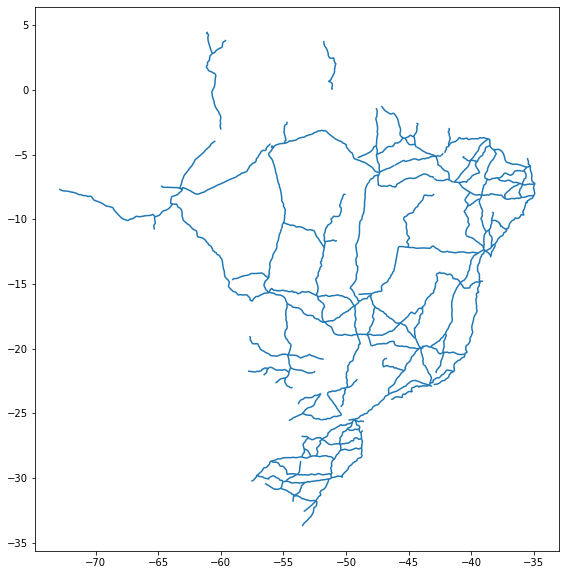

In [60]:
n = [        
  
     ]

rodovia = pd.read_csv('csv/rodovia.csv', delimiter=';', header=0,
                     names=['gid', 'sigla', 'shape_len', 'wkt', 'geometria']).drop(columns=['geometria'])


print(list(rodovia.columns))

rodovia['geometry'] = rodovia['wkt'].apply(wkt.loads)

rodovia_gdf = gpd.GeoDataFrame(rodovia, crs='epsg:4326').drop(columns=['wkt'])

rodovia_gdf.head(1)

rodovia_gdf.plot(figsize=(16,10))

['gid', 'ferrovia', 'operacao', 'observacao', 'extensaokm', 'bitolatipo', 'produtos', 'ferrosigla', 'pnvcoin', 'operadora', 'codpnvsimp', 'modal', 'bitola_ext', 'situacao', 'cod_pnv', 'wkt']


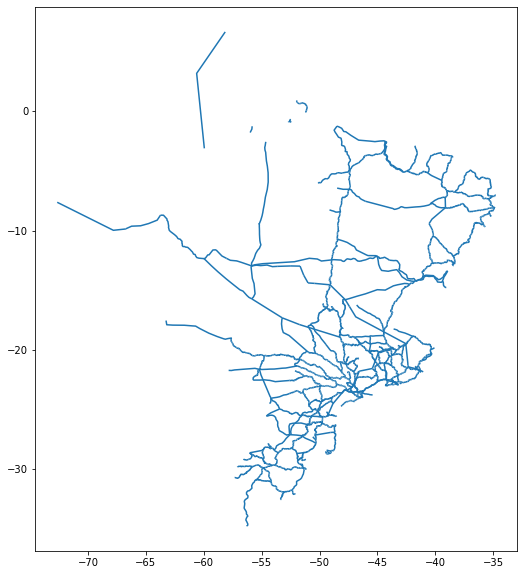

In [61]:
ferrovia = pd.read_csv('csv/ferrovia.csv', delimiter=';', header=0).drop(columns=['geometria'])


print(list(ferrovia.columns))

ferrovia['geometry'] = ferrovia['wkt'].apply(wkt.loads)

ferrovia_gdf = gpd.GeoDataFrame(ferrovia, crs='epsg:4326').drop(columns=['wkt'])

ferrovia_gdf.head(1)

ferrovia_gdf.plot(figsize=(16,10))

['gid', 'nome', 'entidade', 'situacao', 'tipo_rede', 'agente', 'km', 'dt_ent_op', 'ident', 'idgeo', 'wkt']


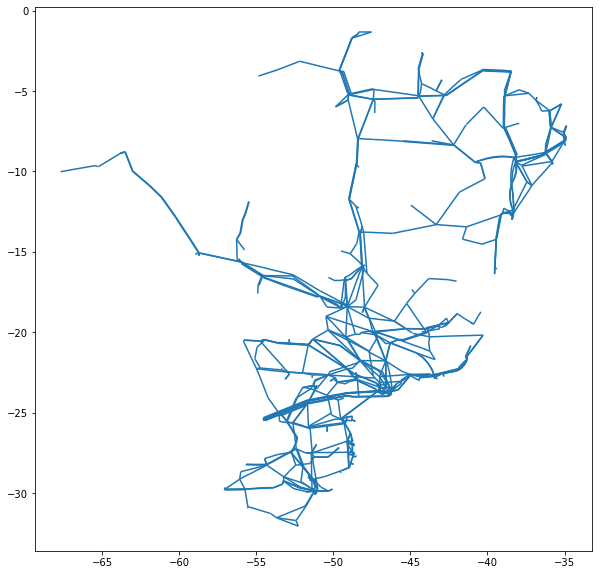

In [62]:
linhatransmissao = pd.read_csv('csv/linhatransmissao.csv', delimiter=';', header=0,
                     names=['gid', 'nome', 'entidade', 'situacao', 'tipo_rede',
                            'agente', 'km', 'dt_ent_op', 'ident', 'idgeo',
                            'wkt', 'geometria']).drop(columns=['geometria'])


print(list(linhatransmissao.columns))

linhatransmissao['geometry'] = linhatransmissao['wkt'].apply(wkt.loads)

linhatransmissao_gdf = gpd.GeoDataFrame(linhatransmissao, crs='epsg:4326').drop(columns=['wkt'])

linhatransmissao_gdf.head(1)

linhatransmissao_gdf.plot(figsize=(16,10))